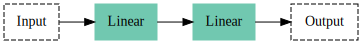

In [1]:
import nir
import nirviz
import importlib
importlib.reload(nirviz)
import numpy as np

w = np.random.randn(2, 2)
graph = nir.NIRGraph.from_list(nir.Linear(weight=w), nir.Linear(weight=w))
viz = nirviz.visualize(graph)
viz.show()

In [15]:
import snntorch as snn
import torch

importlib.reload(snn)
importlib.reload(nirviz)
import numpy as np

lif1 = snn.Leaky(beta=0.9, init_hidden=True)
lif2 = snn.Leaky(beta=0.9, init_hidden=True, output=True)

# Create a network
snntorch_network = torch.nn.Sequential(
    torch.nn.Flatten(),
    #torch.nn.Linear(784, 500),
    # lif1,
    # torch.nn.Linear(500, 10),
    # lif2
)

sample_data = torch.randn(1, 784)

# Export to nir
nir_model = snn.export_to_nir(snntorch_network, sample_data)

# viz = nirviz.visualize(nir_model)
# viz.show()

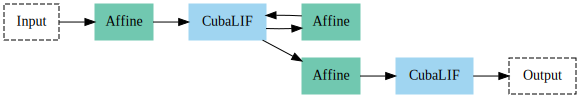

In [18]:
a = np.random.randn(2)
ir = nir.NIRGraph(
    nodes={
        "input": nir.Input(input_type=np.array([2])),
        "affine1": nir.Affine(weight=np.zeros((2,2)), bias=False),
        "cu1": nir.CubaLIF(tau_mem=a, tau_syn=a, r=a, v_leak=a, v_threshold=a, v_reset=a),
        "affine_rec": nir.Affine(weight=np.zeros((2,2)), bias=False),
        "affine2": nir.Affine(weight=np.zeros((2,2)), bias=False),
        "cu2": nir.CubaLIF(tau_mem=a, tau_syn=a, r=a, v_leak=a, v_threshold=a, v_reset=a),
        "output": nir.Output(output_type=np.array([2]))
    },
    edges=[("input", "affine1"), ("affine1", "cu1"), ("affine_rec", "cu1"),  ("cu1", "affine_rec"), ("cu1", "affine2"), ("affine2", "cu2"), ("cu2", "output")])

nir.write("./srnn.nir", ir)

viz = nirviz.visualize(ir)
viz.show()
viz.to_image().save("./img/srnn.png")